# Business Understanding

1. Dataset: prosperLoanData.csv

Questions:
1. How Stated Monthly Income of all the Borrowers
2. How BorrowerRate of all the Borrowers
3. How IncomeRange of all the Borrowers

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Acessing the Data


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
cols = ['Term',
       'LoanStatus',
       'EstimatedEffectiveYield',
       'BorrowerAPR',
       'BorrowerRate',
       'ProsperRating (numeric)',
       'ProsperRating (Alpha)',
       'ProsperScore',
       'ListingCategory (numeric)',
       'EmploymentStatus',
       'Occupation',
       'EmploymentStatusDuration',
       'IsBorrowerHomeowner',
       'IncomeVerifiable',
       'StatedMonthlyIncome',
       'MonthlyLoanPayment',
       'Recommendations',
       'DebtToIncomeRatio',
       'TotalTrades',
       'LoanOriginalAmount',
       'PercentFunded',
       'IncomeRange',
       'Investors',
       'BorrowerState',]

In [5]:
loan_df = df[cols]

In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 24 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
EstimatedEffectiveYield      84853 non-null float64
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ProsperRating (numeric)      84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
Occupation                   110349 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
IncomeVerifiable             113937 non-null bool
StatedMonthlyIncome          113937 non-null float64
MonthlyLoanPayment           113937 non-null float64
Recommendations              113937 non-null int64
DebtToIn

In [7]:
loan_df.head()

,Term,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,...,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,TotalTrades,LoanOriginalAmount,PercentFunded,IncomeRange,Investors,BorrowerState
0,36,Completed,NaN,0.16516,0.1580,NaN,NaN,NaN,0,Self-employed,...,3083.333333,330.43,0,0.17,11.0,9425,1.0,"$25,000-49,999",258,CO
1,36,Current,0.07960,0.12016,0.0920,6.0,A,7.0,2,Employed,...,6125.000000,318.93,0,0.18,29.0,10000,1.0,"$50,000-74,999",1,CO
2,36,Completed,NaN,0.28269,0.2750,NaN,NaN,NaN,0,Not available,...,2083.333333,123.32,0,0.06,NaN,3001,1.0,Not displayed,41,GA
3,36,Current,0.08490,0.12528,0.0974,6.0,A,9.0,16,Employed,...,2875.000000,321.45,0,0.15,26.0,10000,1.0,"$25,000-49,999",158,GA
4,36,Current,0.18316,0.24614,0.2085,3.0,D,4.0,2,Employed,...,9583.333333,563.97,0,0.26,39.0,15000,1.0,"$100,000+",20,MN


## Data Cleaning


In [8]:
#Check Duplicate
loan_df.duplicated().sum()

1

In [9]:
#Check Null
loan_df.isnull().sum()

Term                             0
LoanStatus                       0
EstimatedEffectiveYield      29084
BorrowerAPR                     25
BorrowerRate                     0
ProsperRating (numeric)      29084
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
EmploymentStatus              2255
Occupation                    3588
EmploymentStatusDuration      7625
IsBorrowerHomeowner              0
IncomeVerifiable                 0
StatedMonthlyIncome              0
MonthlyLoanPayment               0
Recommendations                  0
DebtToIncomeRatio             8554
TotalTrades                   7544
LoanOriginalAmount               0
PercentFunded                    0
IncomeRange                      0
Investors                        0
BorrowerState                 5515
dtype: int64

In [10]:
# drop NaN value
loan_df = loan_df.dropna()

In [11]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 24 columns):
Term                         76216 non-null int64
LoanStatus                   76216 non-null object
EstimatedEffectiveYield      76216 non-null float64
BorrowerAPR                  76216 non-null float64
BorrowerRate                 76216 non-null float64
ProsperRating (numeric)      76216 non-null float64
ProsperRating (Alpha)        76216 non-null object
ProsperScore                 76216 non-null float64
ListingCategory (numeric)    76216 non-null int64
EmploymentStatus             76216 non-null object
Occupation                   76216 non-null object
EmploymentStatusDuration     76216 non-null float64
IsBorrowerHomeowner          76216 non-null bool
IncomeVerifiable             76216 non-null bool
StatedMonthlyIncome          76216 non-null float64
MonthlyLoanPayment           76216 non-null float64
Recommendations              76216 non-null int64
DebtToIncomeRatio     

In [12]:
loan_df.head()

,Term,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,...,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,TotalTrades,LoanOriginalAmount,PercentFunded,IncomeRange,Investors,BorrowerState
1,36,Current,0.07960,0.12016,0.0920,6.0,A,7.0,2,Employed,...,6125.000000,318.93,0,0.18,29.0,10000,1.0,"$50,000-74,999",1,CO
3,36,Current,0.08490,0.12528,0.0974,6.0,A,9.0,16,Employed,...,2875.000000,321.45,0,0.15,26.0,10000,1.0,"$25,000-49,999",158,GA
4,36,Current,0.18316,0.24614,0.2085,3.0,D,4.0,2,Employed,...,9583.333333,563.97,0,0.26,39.0,15000,1.0,"$100,000+",20,MN
5,60,Current,0.11567,0.15425,0.1314,5.0,B,10.0,1,Employed,...,8333.333333,342.37,0,0.36,47.0,15000,1.0,"$100,000+",1,NM
6,36,Current,0.23820,0.31032,0.2712,2.0,E,2.0,1,Employed,...,2083.333333,122.67,0,0.27,16.0,3000,1.0,"$25,000-49,999",1,KS


In [13]:
#Change some column name
loan_df.rename(columns = {'ProsperRating (Alpha)':'ProsperRating_Alpha',
                          'ProsperRating (numeric)':'ProsperRaring_Numeric',
                          'ListingCategory (numeric)':'ListingCategory_Numeric'}, inplace = True)

In [14]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 24 columns):
Term                        76216 non-null int64
LoanStatus                  76216 non-null object
EstimatedEffectiveYield     76216 non-null float64
BorrowerAPR                 76216 non-null float64
BorrowerRate                76216 non-null float64
ProsperRaring_Numeric       76216 non-null float64
ProsperRating_Alpha         76216 non-null object
ProsperScore                76216 non-null float64
ListingCategory_Numeric     76216 non-null int64
EmploymentStatus            76216 non-null object
Occupation                  76216 non-null object
EmploymentStatusDuration    76216 non-null float64
IsBorrowerHomeowner         76216 non-null bool
IncomeVerifiable            76216 non-null bool
StatedMonthlyIncome         76216 non-null float64
MonthlyLoanPayment          76216 non-null float64
Recommendations             76216 non-null int64
DebtToIncomeRatio           76216 non-n

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what category and rating are the most for the Loan outcome in the dataset

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that Loan status will have huge impact with the background of the borrower like occupation, income. And Prosper Rating for analysis the rating

## Univariate Exploration

### **Numerical variables analysis**

In [15]:
(loan_df['StatedMonthlyIncome'].describe())

count     76216.000000
mean       6002.833586
std        5110.743506
min           0.250000
25%        3583.333333
50%        5041.666667
75%        7250.000000
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

In [ ]:
def hist_plot(df, column, xlabel, ylabel, title):
    """
    plot hist for dataframe
    """
    plt.figure(figsize = [10,6]);
    bin_edges = np.arange(0, df[column].max()+1000, 1000);
    plt.hist(data = loan_df, x = column, bins = bin_edges);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(title);

: 

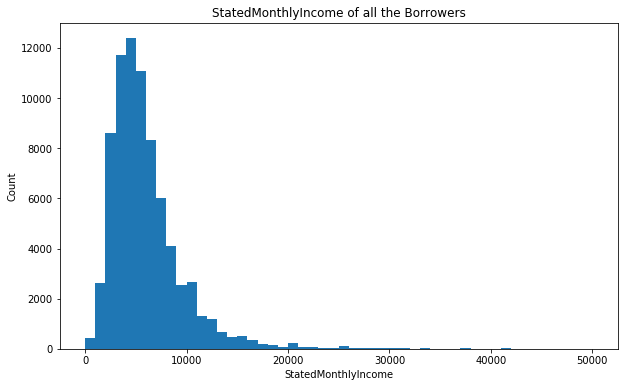

In [16]:
loan_df_sub = loan_df[loan_df['StatedMonthlyIncome'] <= 50000]
hist_plot(loan_df_sub, "StatedMonthlyIncome", "Stated Monthly Income", "Count", "Stated Monthly Income of all the Borrowers")

In [17]:
(loan_df['BorrowerRate'].describe())

count    76216.000000
mean         0.193621
std          0.074088
min          0.040000
25%          0.134900
50%          0.184500
75%          0.254900
max          0.360000
Name: BorrowerRate, dtype: float64

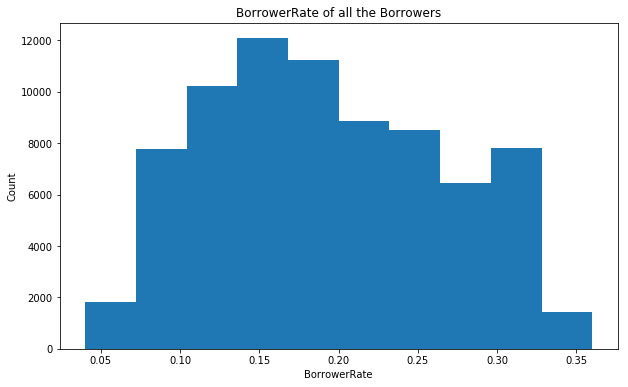

In [18]:
plt.figure(figsize = [10,6])
plt.hist(data = loan_df, x = 'BorrowerRate');
plt.xlabel('BorrowerRate');
plt.ylabel('Count');
plt.title("BorrowerRate of all the Borrowers");

In [19]:
(loan_df['LoanOriginalAmount'].describe())

count    76216.000000
mean      9294.999410
std       6413.404265
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14603.250000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

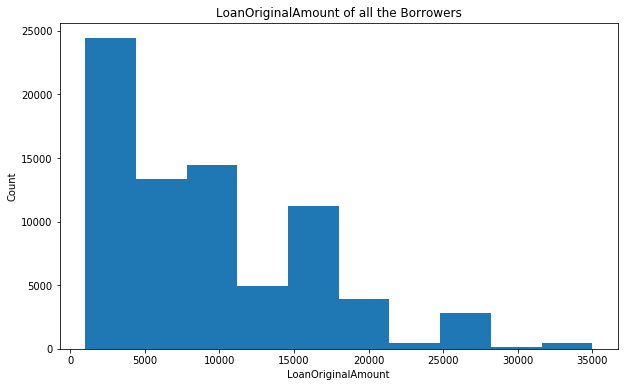

In [20]:
plt.figure(figsize = [10,6])
plt.hist(data = loan_df, x = 'LoanOriginalAmount');
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all the Borrowers");

In [21]:
(loan_df['Investors'].describe())

count    76216.000000
mean        69.998517
std         97.801415
min          1.000000
25%          1.000000
50%         32.000000
75%        100.000000
max       1189.000000
Name: Investors, dtype: float64

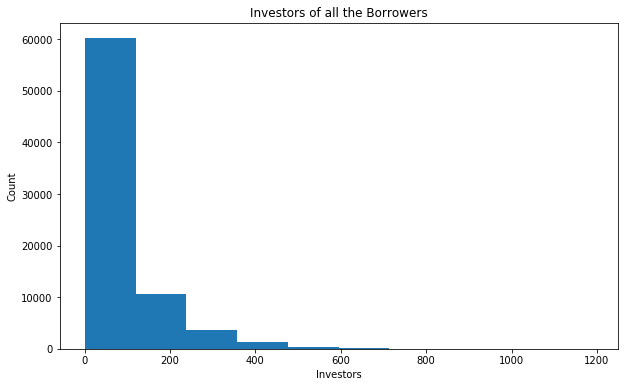

In [22]:
plt.figure(figsize = [10,6])
plt.hist(data = loan_df, x = 'Investors');
plt.xlabel('Investors');
plt.ylabel('Count');
plt.title("Investors of all the Borrowers");

### **Categorical variables analysis**

In [23]:
loan_df.ProsperRating_Alpha.value_counts()

C     16499
B     14379
A     13490
D     12629
E      8443
HR     5680
AA     5096
Name: ProsperRating_Alpha, dtype: int64

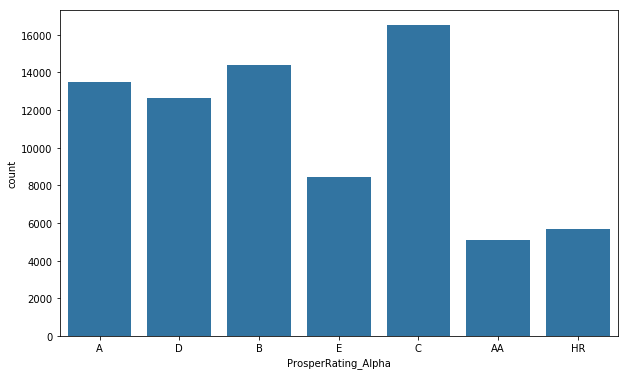

In [24]:
plt.figure(figsize = [10,6])
base_color = sb.color_palette()[0]
sb.countplot(loan_df['ProsperRating_Alpha'], color = base_color)

In [25]:
sorted_counts = loan_df[loan_df['IncomeRange'] != 'Not employed']

(-1.1194860921998138,
 1.113172758227599,
 -1.1113399102152837,
 1.1213189402121291)

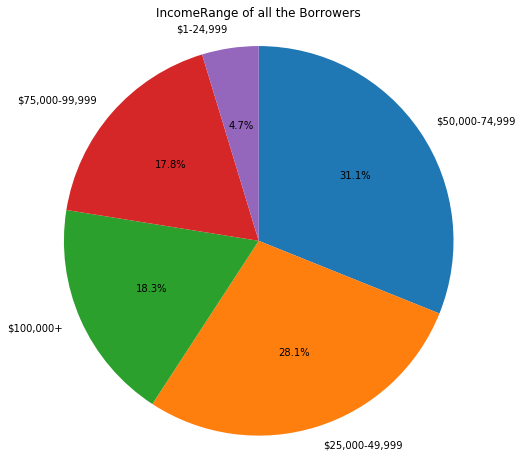

In [26]:
plt.figure(figsize = [15,8])
sorted_counts = sorted_counts['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct = '%.1f%%');
plt.title("IncomeRange of all the Borrowers")
plt.axis('square')

In [27]:
top_state = loan_df['BorrowerState'].value_counts().head(10)

Text(0.5,1,'Top 10 states of all the Borrowers')

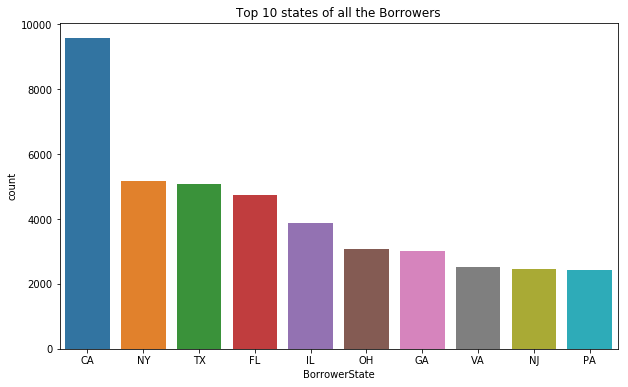

In [28]:
#BorrowerState
plt.figure(figsize = [10,6])
sb.countplot(data = loan_df, x = 'BorrowerState',
             order = top_state.index)
plt.title("Top 10 states of all the Borrowers")

In [29]:
top_occupation = loan_df['Occupation'].value_counts().head(10)

Text(0.5,1,'Top 10 Occupation using Loan')

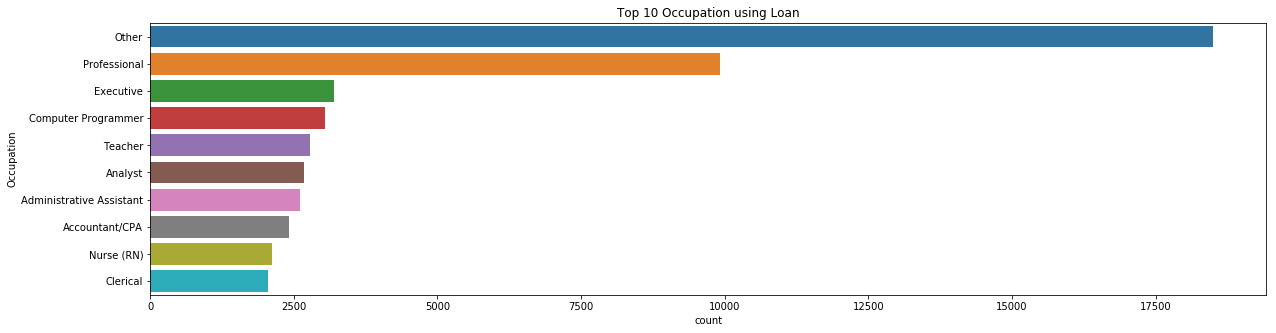

In [30]:
#Occupation
plt.figure(figsize = [20,5])
sb.countplot(data = loan_df, y = 'Occupation',
             order = top_occupation.index)
plt.title("Top 10 Occupation using Loan")

### The count of ListingCategory_Numeric

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

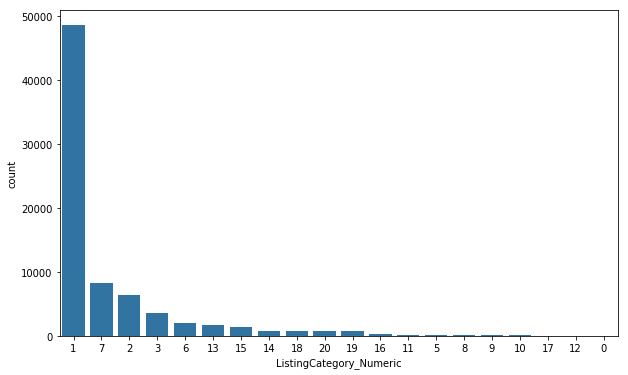

In [31]:
plt.figure(figsize = [10, 6]) 
base_color = sb.color_palette()[0]
sb.countplot(loan_df['ListingCategory_Numeric'], color = base_color,order = loan_df['ListingCategory_Numeric'].value_counts().index)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Information from Numerical variables analysis
- **StatedMonthlyIncome**: The monthly income the borrower stated at the time the listing was created. Most of the borrowers are having a salary less than 10000USD and the peak at nearly 5000USD
- **BorrowRate**: The Borrower's interest rate for this loan. The borrowers rate follow an approximately distribution with the peak nearly 0.16
- **LoanOriginalAmount**: The origination amount of the loan. It has multiple peaks at 4000USD, 10000USD and 15000USD
- **Investors**: The number of investors that funded the loan. Many investors between 0 and 100

> Information from Categorical variables analysis
- The loan with "C" category are highest the count
- Top IncomeRange of all Borrowers are within 50,000-74,999
- Top 2 states of all Borrowers are from CA and NY
- Majority of the borrowers are with an occupation of Professional and Executive
- The top 2 loan consideration reasons are 1 - Debt Consolidation, 2- Home Improvement

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I don't see any unsual distribution on this data

## Bivariate Exploration

In [32]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 24 columns):
Term                        76216 non-null int64
LoanStatus                  76216 non-null object
EstimatedEffectiveYield     76216 non-null float64
BorrowerAPR                 76216 non-null float64
BorrowerRate                76216 non-null float64
ProsperRaring_Numeric       76216 non-null float64
ProsperRating_Alpha         76216 non-null object
ProsperScore                76216 non-null float64
ListingCategory_Numeric     76216 non-null int64
EmploymentStatus            76216 non-null object
Occupation                  76216 non-null object
EmploymentStatusDuration    76216 non-null float64
IsBorrowerHomeowner         76216 non-null bool
IncomeVerifiable            76216 non-null bool
StatedMonthlyIncome         76216 non-null float64
MonthlyLoanPayment          76216 non-null float64
Recommendations             76216 non-null int64
DebtToIncomeRatio           76216 non-n

In [33]:
numeric = ['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate', 'ProsperRaring_Numeric', 'ProsperScore', 'ListingCategory_Numeric', 'EmploymentStatusDuration', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'PercentFunded', 'Investors']
numeric_1 = ['BorrowerRate', 'ProsperScore', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'LoanOriginalAmount', 'Investors']
categoric = ['LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus', 'Occupation', 'IncomeRange', 'BorrowerState', 'Term', 'IsBorrowerHomeowner']

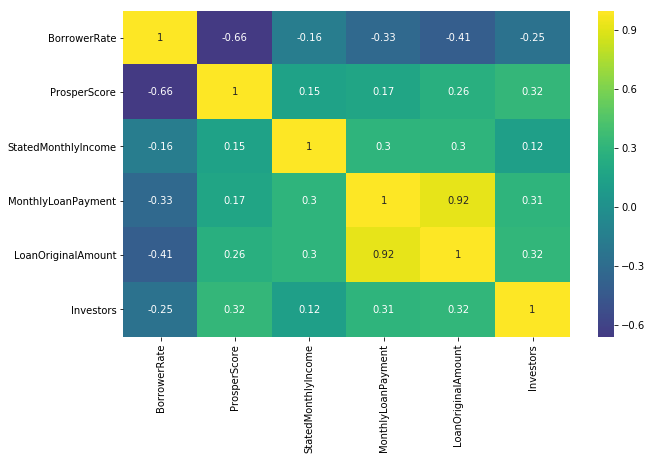

In [34]:
plt.figure(figsize = [10, 6])
sb.heatmap(loan_df[numeric_1].corr(), annot = True,
          cmap = 'viridis', center = 0)

Text(0.5,1,'Income Range vs Loan Amount')

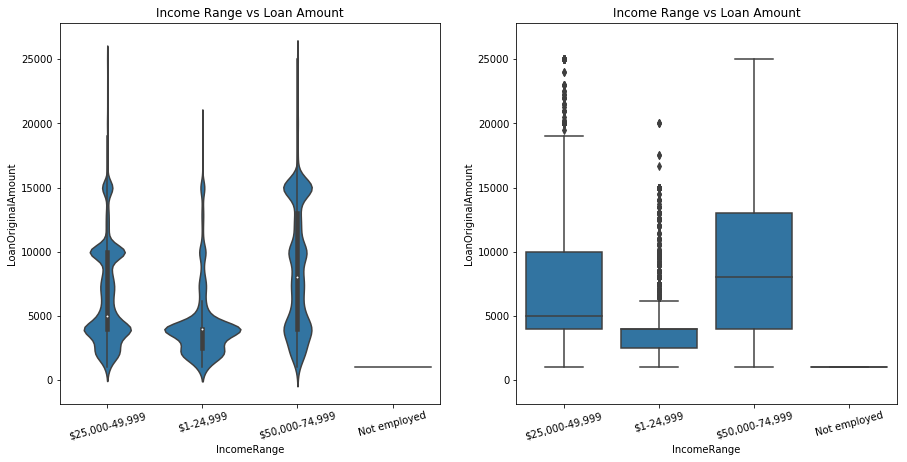

In [35]:
loan_df_sub = loan_df[(loan_df['StatedMonthlyIncome'] <= 5000)]
loan_df_sub = loan_df_sub[loan_df_sub['IncomeRange'] != 'Not Employed']


plt.figure(figsize = [15,7])
base_color = sb.color_palette()[0]

#left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

#Right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
#set y-axis limits to be same as left plot
plt.ylim(ax1.get_ylim())
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

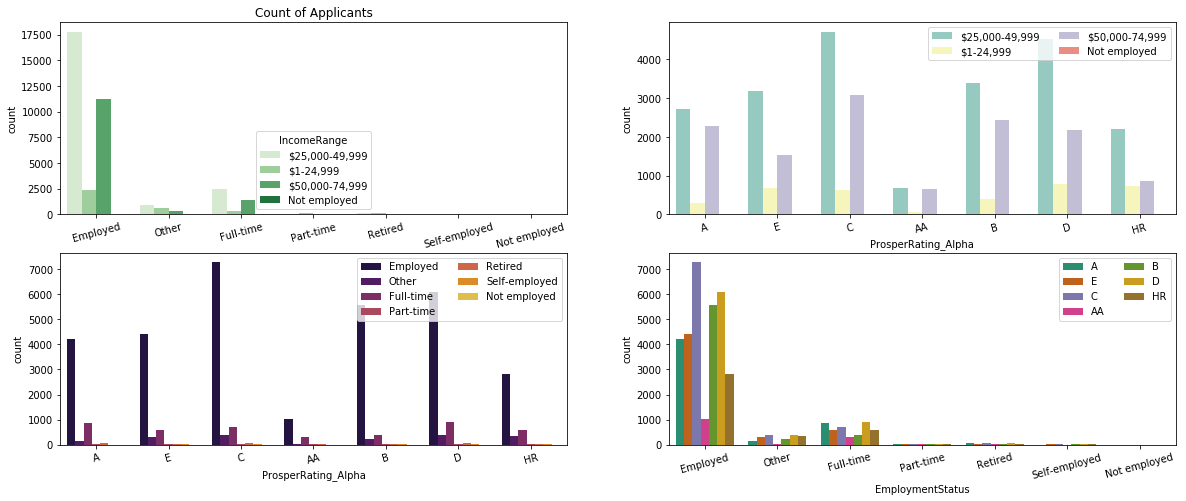

In [36]:
plt.figure(figsize = [20,12])

#Subplot 1: color vs cut
plt.subplot(3, 2, 1)
sb.countplot(data = loan_df_sub, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Greens')
plt.xticks(rotation = 15)
plt.title('Count of Applicants')

#Subplot 2: clarity vs cut
ax = plt.subplot(3, 2, 2)
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'IncomeRange', palette = 'Set3')
#re-arrange legend to reduce overlapping
ax.legend(ncol = 2)
plt.xticks(rotation = 15)

#Subplot 3: clarity vs color and use different color palette
ax = plt.subplot(3, 2, 3)
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'EmploymentStatus', palette = 'inferno')
#re-arrange legend to remove overlapping
ax.legend(loc = 1, ncol = 2)
plt.xticks(rotation = 15)

ax = plt.subplot(3, 2, 4)
sb.countplot(data = loan_df_sub, x = 'EmploymentStatus', hue = 'ProsperRating_Alpha', palette = 'Dark2')
#re-arrange legend to remove overlapping
ax.legend(loc = 1, ncol = 2)
plt.xticks(rotation = 15)


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Insights about the entire Bivariate analysis
- Loan original amount and monthly loan payment has strong correlated (with 0.92).Otherwise, borrowers rate and proper score are highly negative correlated
- The income range of employed is the highest
- LoanOriginalAmount is highest for A and B Prosper ratings, when compared with income range
- The most prosper rating is C with the range salary from 25k to 50k
- Employed are using the prosper rating C is the highest

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Surprisingly, the person with the highest salary who is employed has a prosper rating of C. Additionally, there is a strong negative correlation between the borrower rate and the appropriate score.

## Multivariate Exploration

> Plot three or more variables together to further explore your data. Verify that your research is supported by and builds upon the work you did in the previous sections.

Text(0.5,1,'Applicants - Mean monthly Income')

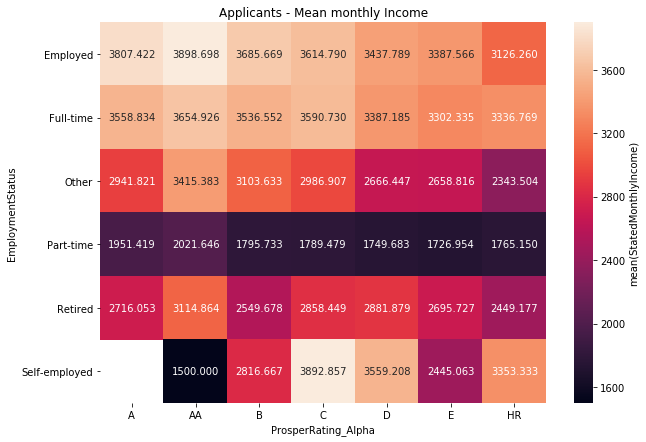

In [40]:
plt.figure(figsize = [10,7])
loan_df_sub = loan_df_sub[loan_df_sub['EmploymentStatus'] != 'Not employed']

cat_means = loan_df_sub.groupby(['ProsperRating_Alpha','EmploymentStatus']).mean()['StatedMonthlyIncome']
cat_means = cat_means.reset_index(name = 'StatedMonthlyIncome_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'ProsperRating_Alpha', values = 'StatedMonthlyIncome_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f', cbar_kws = {'label' : 'mean(StatedMonthlyIncome)'});
plt.title('Applicants - Mean monthly Income')

### Applicants rating with the monthly Income and Employment Status


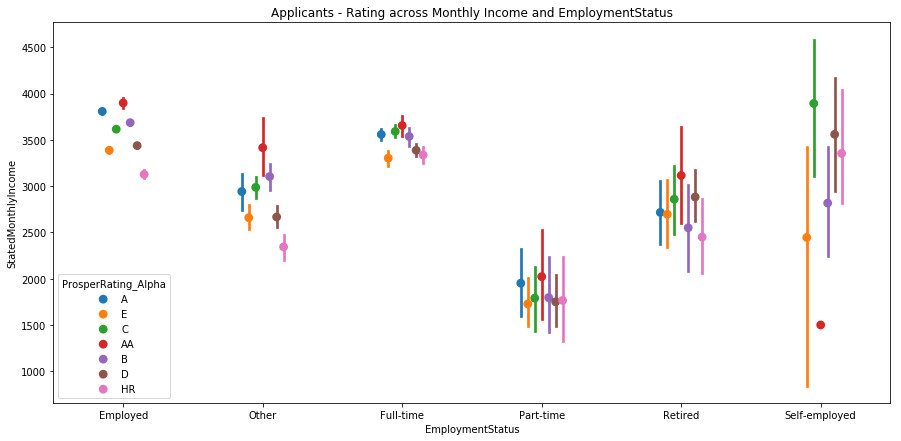

In [41]:
# To identify how the applicants rating is affected by Employment Status and Monthly Income
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_df_sub, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating_Alpha',
                  dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');

### Applicants rating with the borrwers interest rate and homeowner status


Text(0.5,1,'Applicants - Home owner status across ProsperRating and BorrowerRate')

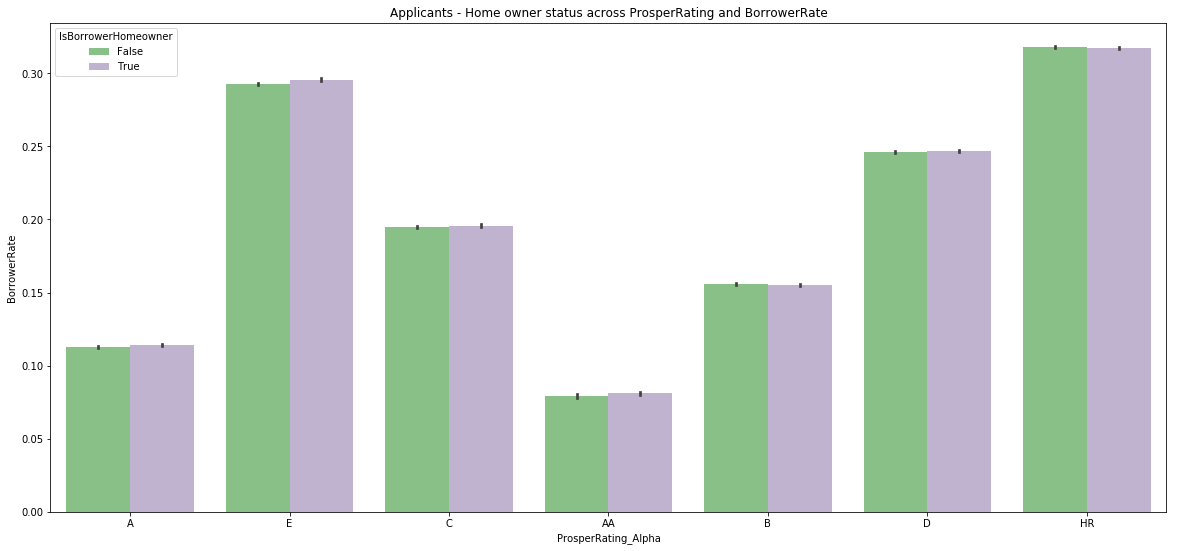

In [39]:
plt.figure(figsize = [20,9])
g = sb.barplot( x = 'ProsperRating_Alpha', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner', data = loan_df_sub, palette = 'Accent')
plt.title('Applicants - Home owner status across ProsperRating and BorrowerRate')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Insights from the multivate exploration data
- The average salaries of employed and full-time workers are higher
- With prosper ratings of AA,A and B, the monthly income of borrowers is higher for those who are employed, have other types of employment and work full-time
- Homeowners typically have lower interest rates as we can see. We can also plainly see that applications with higher HR prosper ratings have a higher interest rate

### Were there any interesting or surprising interactions between features?

> The conclusion that the applicants information regarding their income range, homeownership status and employment status has a significant impact on the loan approval status me as an interesting one.